# Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from collections import Counter, OrderedDict
import calendar

import plot_help, utils

%matplotlib inline

## Load the Data

In [2]:
#location of file
review_dir = 'data/review.json'
#load in chunks
review_df = utils.chunk_loader(review_dir, read_limit=0)
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [3]:
#general shape
review_df.shape

(6685900, 9)

In [4]:
# null Entries
review_df.isna().mean()

business_id    0.0
cool           0.0
date           0.0
funny          0.0
review_id      0.0
stars          0.0
text           0.0
useful         0.0
user_id        0.0
dtype: float64

In [5]:
#list unique entries and compare with other dataframes
# !NOTE! take a while to run, uncomment to save on time
#review_df.nunique()

In [6]:
review_df.dtypes

business_id            object
cool                    int64
date           datetime64[ns]
funny                   int64
review_id              object
stars                   int64
text                   object
useful                  int64
user_id                object
dtype: object

In [7]:
review_df.describe()

,cool,funny,stars,useful
count,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06
mean,5.787708e-01,4.827667e-01,3.716199e+00,1.354134e+00
std,2.359024e+00,2.378646e+00,1.463643e+00,3.700192e+00
min,-1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00
max,5.060000e+02,1.290000e+03,5.000000e+00,1.241000e+03


## cool

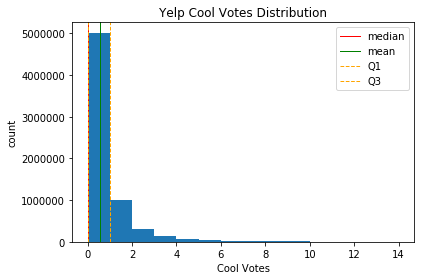

In [8]:
plot_help.plot_hist(review_df['cool'], 
                    feature='Cool Votes',
                    end=15,
                    step=1, 
                    xlabel='Cool Votes',
                    saveloc='plots/review_cool.png')

## funny

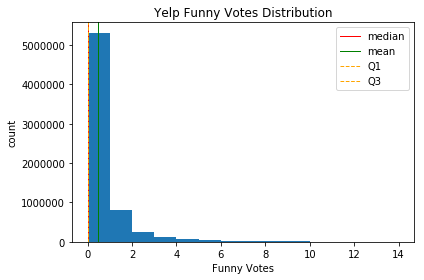

In [9]:
plot_help.plot_hist(review_df['funny'], 
                    feature='Funny Votes',
                    end=15,
                    step=1, 
                    xlabel='Funny Votes',
                    saveloc='plots/review_funny.png')

## stars

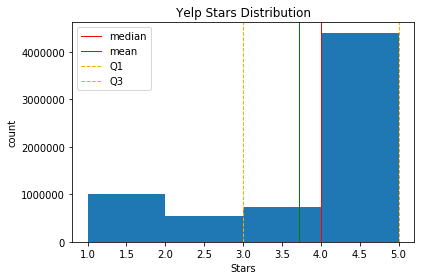

In [10]:
plot_help.plot_hist(review_df['stars'], 
                    feature='Stars', 
                    start=1,
                    end=6,
                    step=1, 
                    xlabel='Stars',
                    saveloc='plots/review_stars.png')

## useful

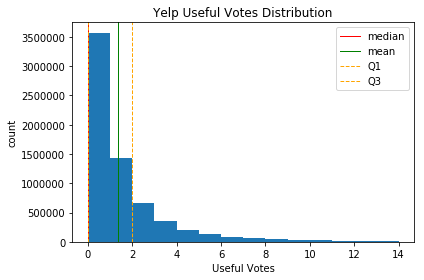

In [11]:
plot_help.plot_hist(review_df['useful'], 
                    feature='Useful Votes',
                    end=15,
                    step=1, 
                    xlabel='Useful Votes',
                    saveloc='plots/review_useful.png')

## date

At a quick glance, we note  that the dates are not necessarily sorted. In addition, the data is `6685900` rows however there are `6552820` unique time stamps, this means that some reviews might have been logged at the same time.

In [13]:
#sort by date from oldest to most current
#review_sort_date = review_df.sort_values('date', ascending=True)

review_sort_date = review_df.copy()

#make index a datetime object
review_sort_date.index = review_df['date']
#drop date column
review_sort_date =  review_sort_date.drop(columns=['date'])
review_sort_date.head()

,business_id,cool,funny,review_id,stars,text,useful,user_id
date,,,,,,,,
2013-05-07 04:34:36,ujmEBvifdJM6h6RLv4wQIg,0,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
2017-01-14 21:30:33,NZnhc2sEQy3RmzKTZnqtwQ,0,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2016-11-09 20:09:03,WTqjgwHlXbSFevF32_DJVw,0,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
2018-01-09 20:56:38,ikCg8xy5JIg_NGPx-MSIDA,0,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
2018-01-30 23:07:38,b1b1eb3uo-w561D0ZfCEiQ,0,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


### aggregate by year

In [14]:
review_year = review_sort_date.groupby(pd.Grouper(freq='Y')).sum()
review_year

,cool,funny,stars,useful
date,,,,
2004-12-31,8,6,58,12
2005-12-31,692,613,3527,1042
2006-12-31,3962,3641,19322,6503
2007-12-31,27878,23287,81529,42533
2008-12-31,86852,79434,212822,133868
2009-12-31,134534,124117,372439,240795
2010-12-31,198934,175457,690795,410193
2011-12-31,243265,227009,1110377,574219
2012-12-31,258530,253643,1336467,706019


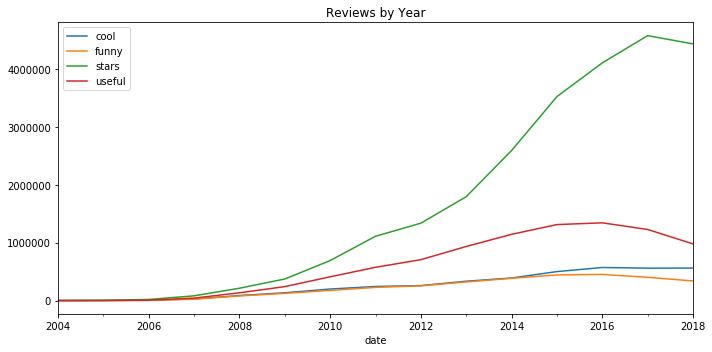

In [15]:
#plot reviews
review_year.plot(figsize=(10,5))
#title and decorators
plt.title("Reviews by Year")
plt.tight_layout()
plt.savefig('plots/review_by_year.png')
plt.show()

### The most common way for customers to express their impressions regarding a business is the star rating system.
### Zoom on on daily reactions

In [16]:
review_day = review_sort_date.groupby(pd.Grouper(freq='1D')).sum()
review_day.head()

,cool,funny,stars,useful
date,,,,
2004-10-12,1,0,5,1
2004-10-13,0,0,0,0
2004-10-14,0,0,0,0
2004-10-15,0,0,0,0
2004-10-16,0,0,0,0


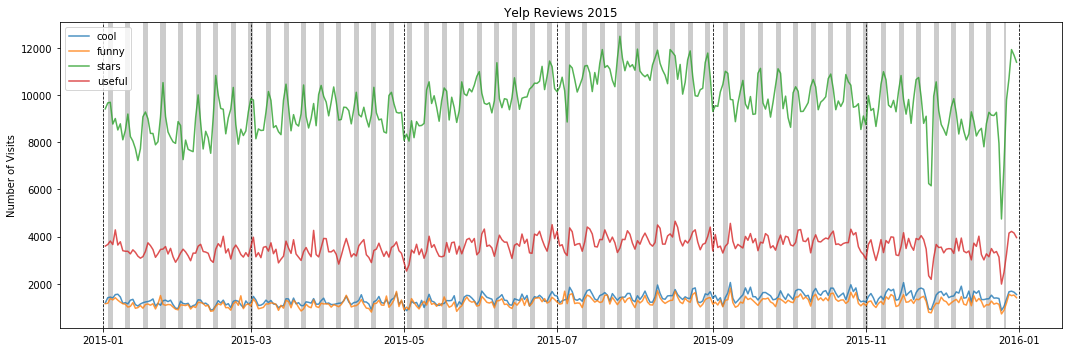

In [17]:
#get 2015-2016 date indeces
df_2015 = review_day[(review_day.index>'2015-01-01') & (review_day.index<'2016-01-01')]
#plot
plot_help.plot_datetime(df_2015, 
                        title='Yelp Reviews 2015', 
                        saveloc='plots/review_2015.png', facecolor='black')

### We can see some seasonality, we zoom in more over a month period

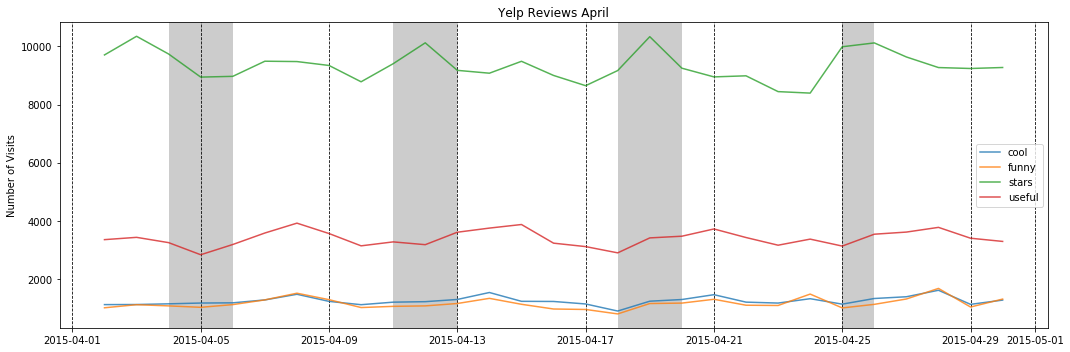

In [18]:
df_2015_april = review_day[(review_day.index>'2015-04-01') & (review_day.index<'2015-05-01')]

plot_help.plot_datetime(df_2015_april, 
                        title='Yelp Reviews April', 
                        saveloc='plots/review_2015_april.png', facecolor='black')

### To tie in with the checkin evaluation, it appears that yelpers go out on the weekends and sometime during the week will give their feedback

In [19]:
#group by half hour intervals and sum
review_halfhour = review_sort_date.groupby(pd.Grouper(freq='30min')).sum()
review_halfhour.head()

,cool,funny,stars,useful
date,,,,
2004-10-12 10:00:00,1,0,5,1
2004-10-12 10:30:00,0,0,0,0
2004-10-12 11:00:00,0,0,0,0
2004-10-12 11:30:00,0,0,0,0
2004-10-12 12:00:00,0,0,0,0


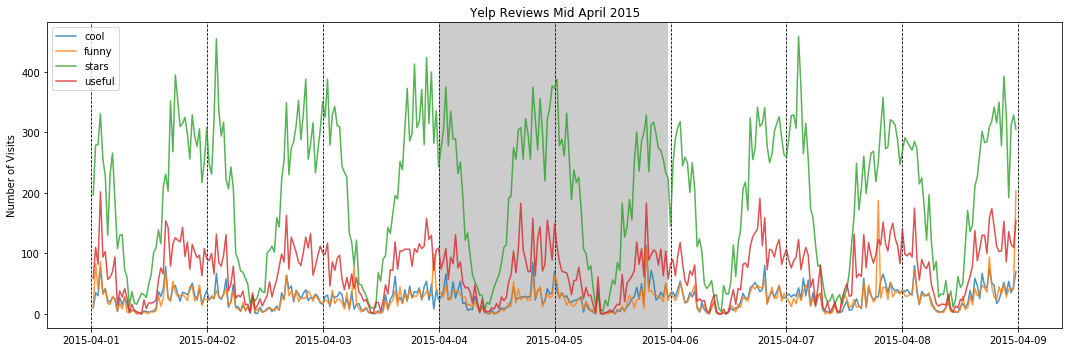

In [20]:
review_halfhour_midapril = review_halfhour[(review_halfhour.index>'2015-04-01 00:00:00')
                                             & (review_halfhour.index<'2015-04-09 00:00:00')]

plot_help.plot_datetime(review_halfhour_midapril,
                        title='Yelp Reviews Mid April 2015', 
                        saveloc='plots/review_2015_april_30min.png', facecolor='black')

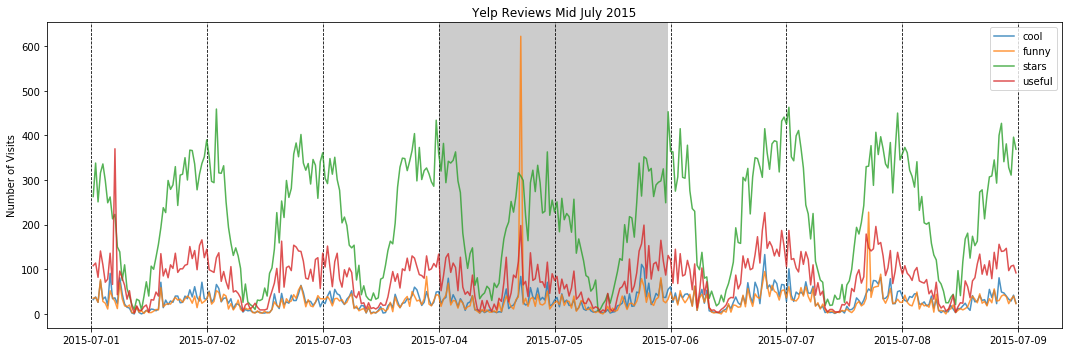

In [21]:
review_halfhour_july = review_halfhour[(review_halfhour.index>'2015-07-01 00:00:00')
                                             & (review_halfhour.index<'2015-07-09 00:00:00')]

plot_help.plot_datetime(review_halfhour_july,
                        title='Yelp Reviews Mid July 2015', 
                        saveloc='plots/review_2015_july_30min.png', facecolor='black')

### This particular week defies what we said above, it is thus appropirate to zoom in on each individual day and provide a confidence interval. Assuming that the reviews are normally distributed, we can say that 95% are contained within 2 standard deviations from the mean

In [22]:
# add a column including time only
review_halfhour['Time']=review_halfhour.index.time

#column for name of day of week
review_halfhour['DayOfWeek'] = review_halfhour.index.weekday_name

review_halfhour.head()

,cool,funny,stars,useful,Time,DayOfWeek
date,,,,,,
2004-10-12 10:00:00,1,0,5,1,10:00:00,Tuesday
2004-10-12 10:30:00,0,0,0,0,10:30:00,Tuesday
2004-10-12 11:00:00,0,0,0,0,11:00:00,Tuesday
2004-10-12 11:30:00,0,0,0,0,11:30:00,Tuesday
2004-10-12 12:00:00,0,0,0,0,12:00:00,Tuesday


In [26]:
#stats to keep track of 
review_cols = ['cool', 'funny', 'stars', 'useful']

#list to store stats
df_dayofweek_list = []

for col in review_cols:
    #group by day of week and aggregate by sum+mean+stf
    day_avg=review_halfhour[[col,'DayOfWeek','Time']].groupby(['DayOfWeek','Time']).agg([np.sum, np.mean, np.std])
    #drop level in colums
    day_avg.columns = day_avg.columns.droplevel()
    
    #extract upper and lower bound as mean +/- 2STD
    day_avg['upper'] = day_avg['mean'] + 2*day_avg['std']
    #take max of 0 and -2STD because votes can't be negative
    day_avg['lower'] = (day_avg['mean'] - 2*day_avg['std']).apply(lambda x: max(x,0))

    #extract day of week name
    day_avg['day']=day_avg.reset_index()['DayOfWeek'].tolist()
    #add prefix
    day_avg= day_avg.add_prefix(col+'_')
    #append to list
    df_dayofweek_list.append(day_avg)

#concatenate
df_day_avg = pd.concat(df_dayofweek_list, axis=1)

df_day_avg.head()

cool_sum  cool_mean   cool_std  cool_upper  cool_lower  \
DayOfWeek Time                                                               
Friday    00:00:00     13841  18.831293  20.333295   59.497883           0   
          00:30:00     14143  19.242177  20.851326   60.944828           0   
          01:00:00     14495  19.721088  21.566001   62.853091           0   
          01:30:00     14604  19.869388  21.202008   62.273404           0   
          02:00:00     14308  19.466667  21.600754   62.668174           0   

                   cool_day  funny_sum  funny_mean  funny_std  funny_upper  \
DayOfWeek Time                                                               
Friday    00:00:00   Friday      11554   15.719728  17.175257    50.070242   
          00:30:00   Friday      11488   15.629932  16.736919    49.103769   
          01:00:00   Friday      12047   16.390476  18.279727    52.949930   
          01:30:00   Friday      11788   16.038095  15.833902    47.705899   
          02:00:00   Friday      11809   16.066667  18.343444    52.753554   

                    ...   stars_std stars_upper  stars_lower  stars_day  \
DayOfWeek Time      ...                                                   
Friday    00:00:00  ...  148.699651  436.034676            0     Friday   
          00:30:00  ...  150.549306  440.176162            0     Friday   
          01:00:00  ...  151.770010  441.801245            0     Friday   
          01:30:00  ...  159.656572  464.464165            0     Friday   
          02:00:00  ...  153.730886  449.425037            0     Friday   

                    useful_sum  useful_mean  useful_std useful_upper  \
DayOfWeek Time                                                         
Friday    00:00:00       34420    46.829932   44.907713   136.645357   
          00:30:00       34917    47.506122   45.568670   138.643463   
          01:00:00       34971    47.579592   49.385476   146.350543   
          01:30:00       34708    47.221769   44.795309   136.812386   
          02:00:00       34266    46.620408   46.056403   138.733213   

                    useful_lower  useful_day  
DayOfWeek Time                                
Friday    00:00:00             0      Friday  
          00:30:00             0      Friday  
          01:00:00             0      Friday  
          01:30:00             0      Friday  
          02:00:00             0      Friday  

[5 rows x 24 columns]

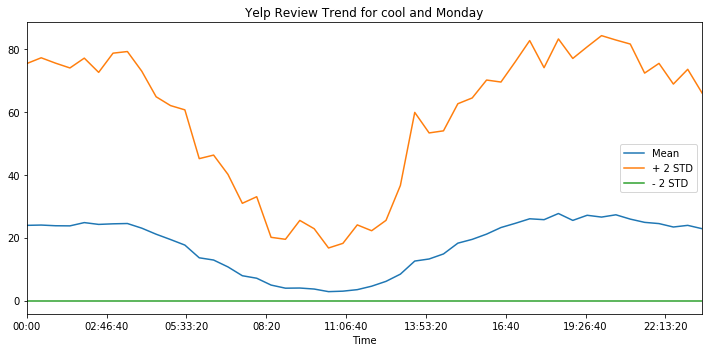

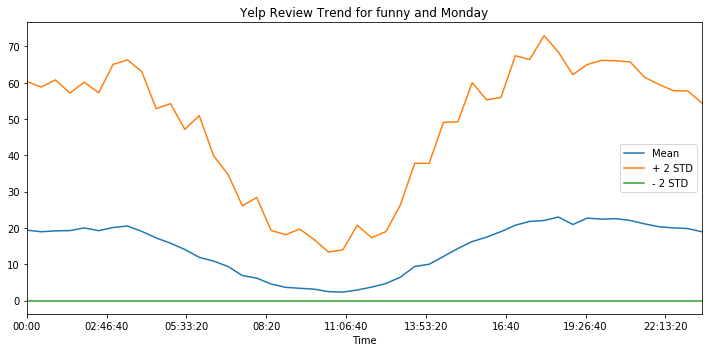

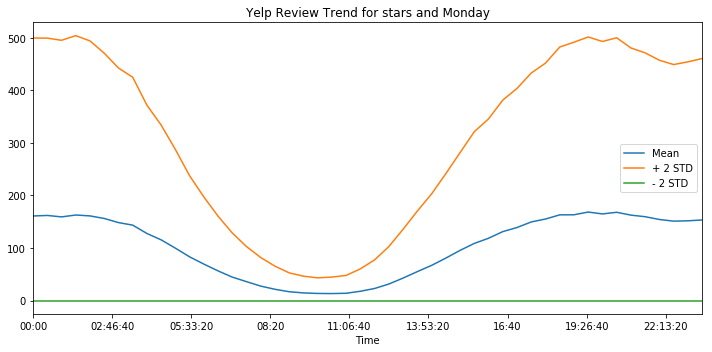

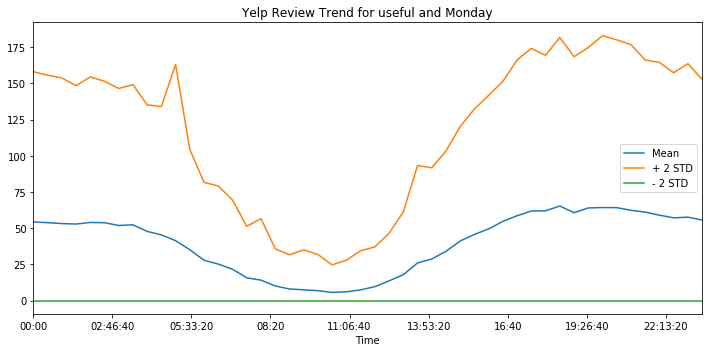

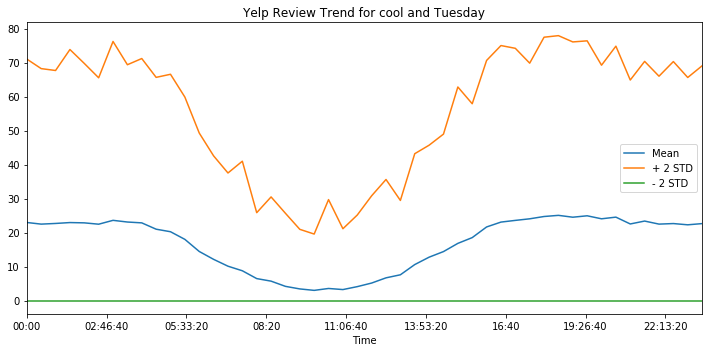

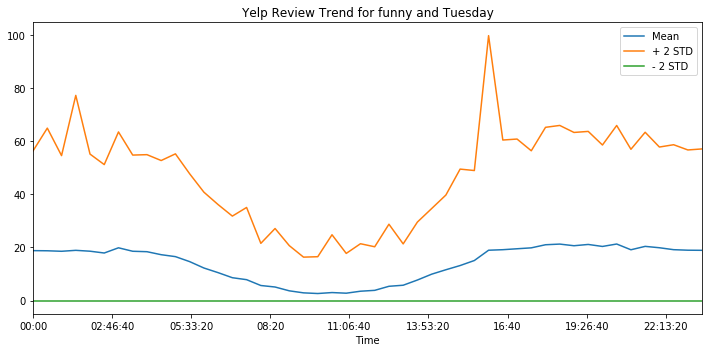

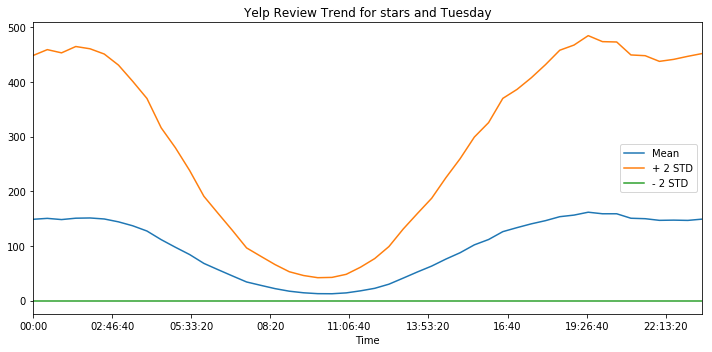

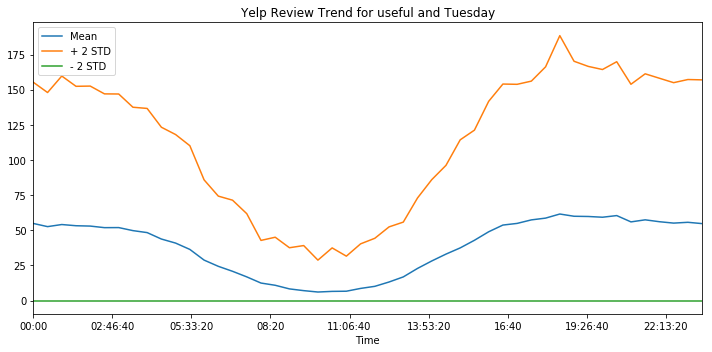

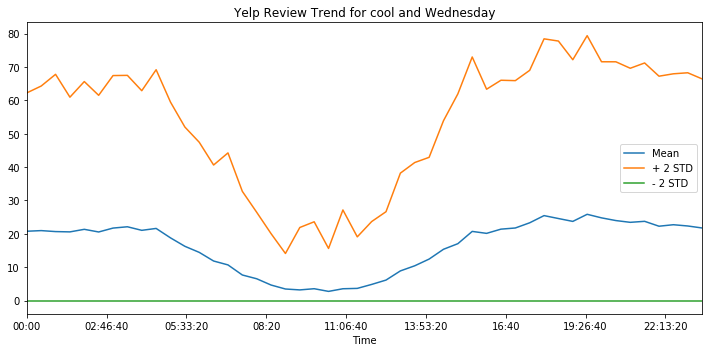

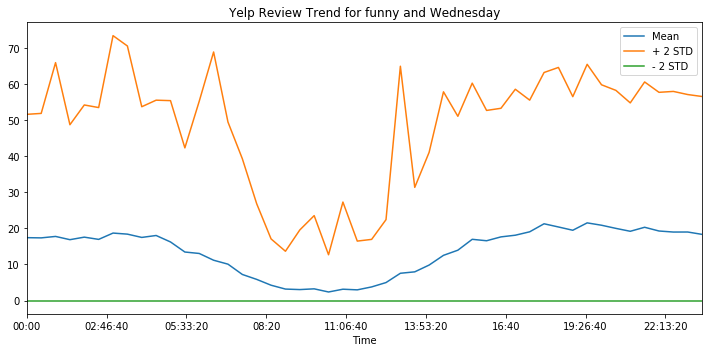

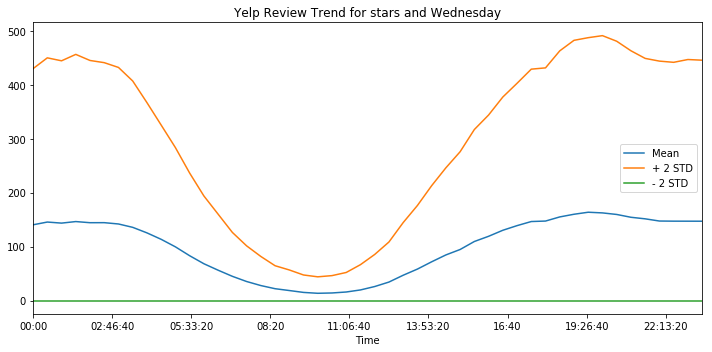

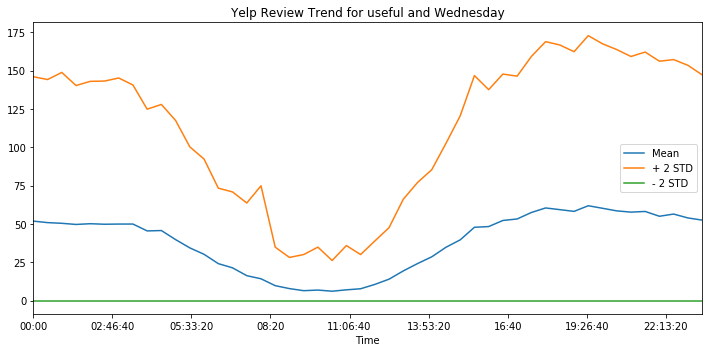

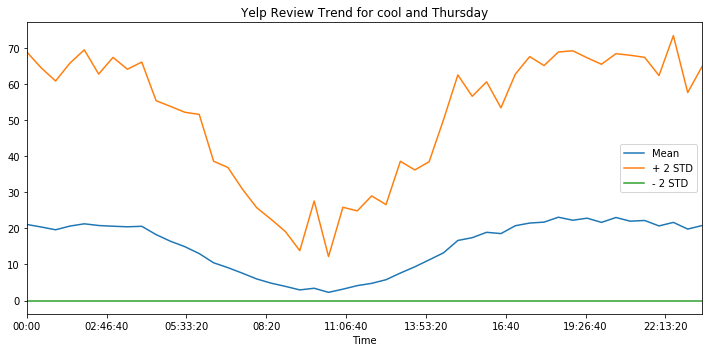

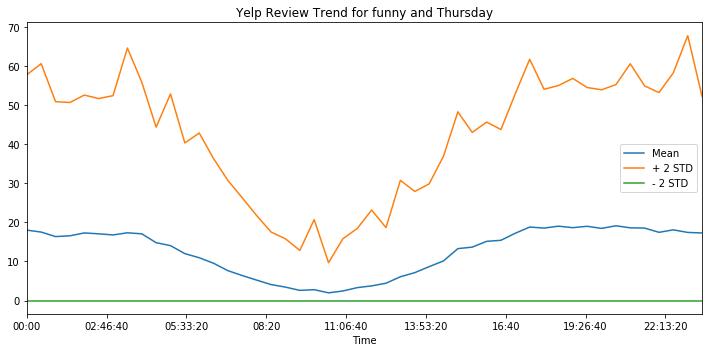

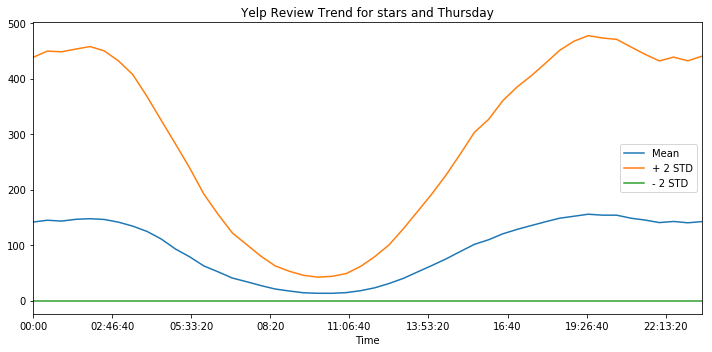

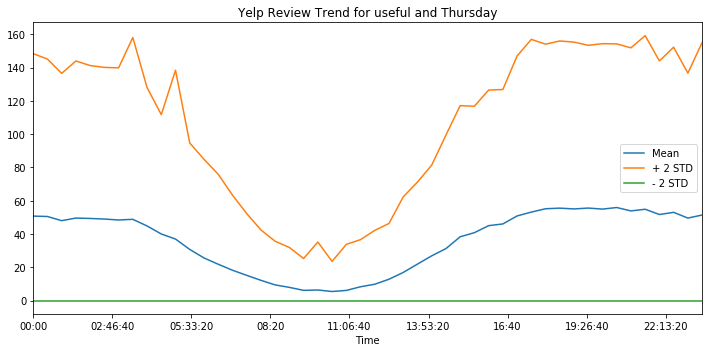

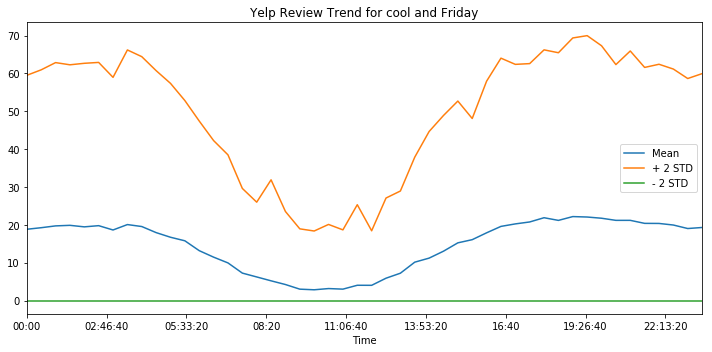

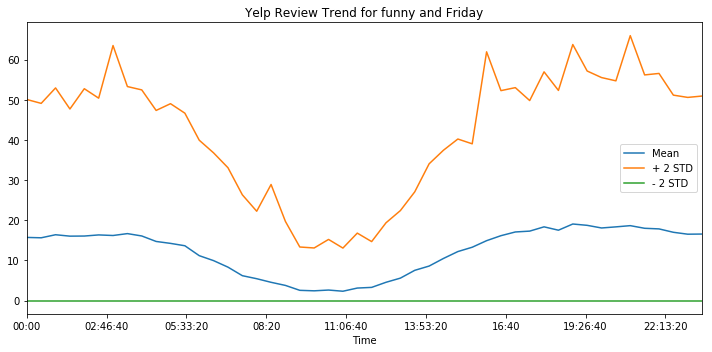

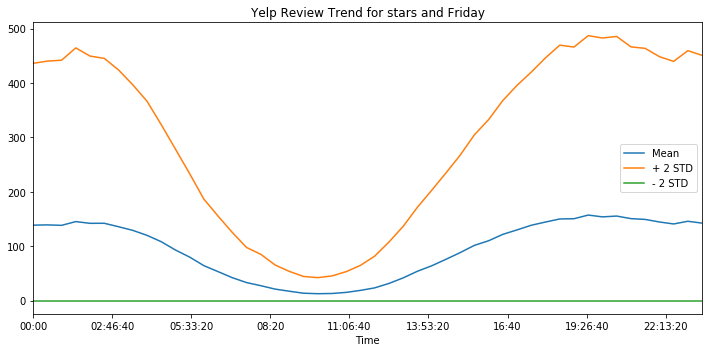

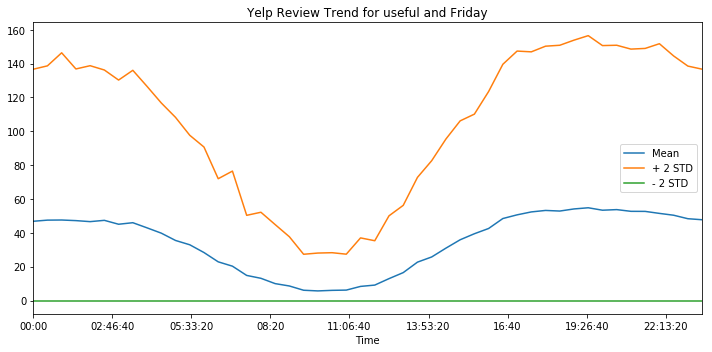

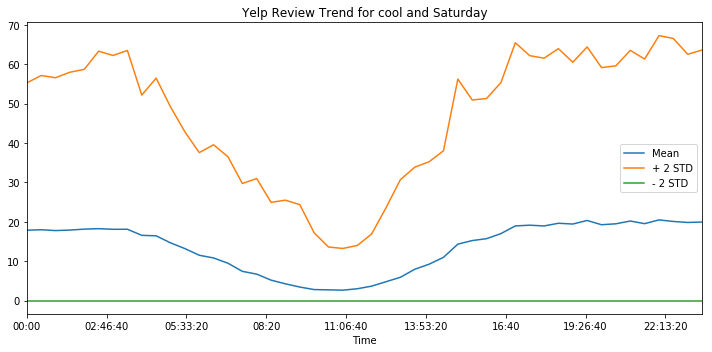

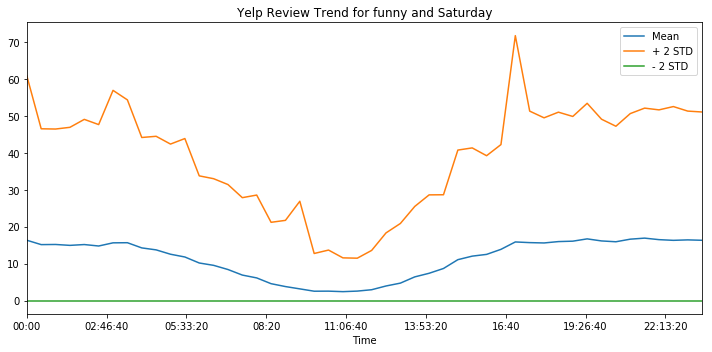

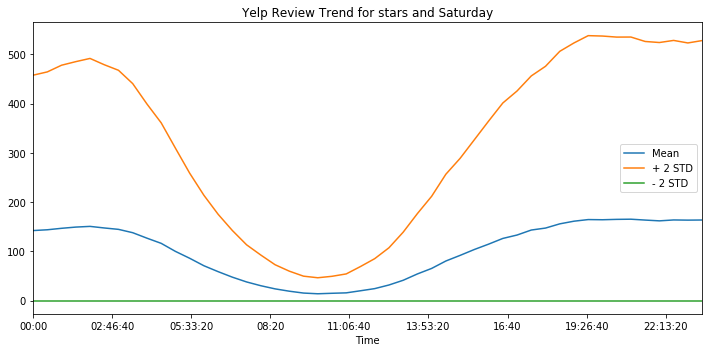

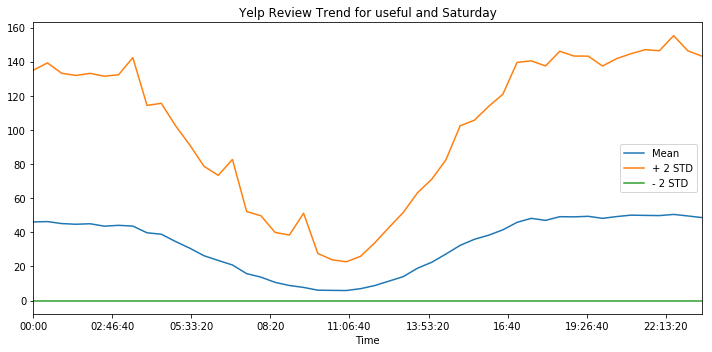

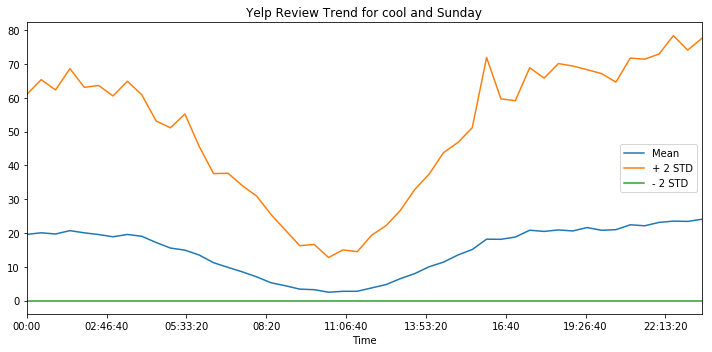

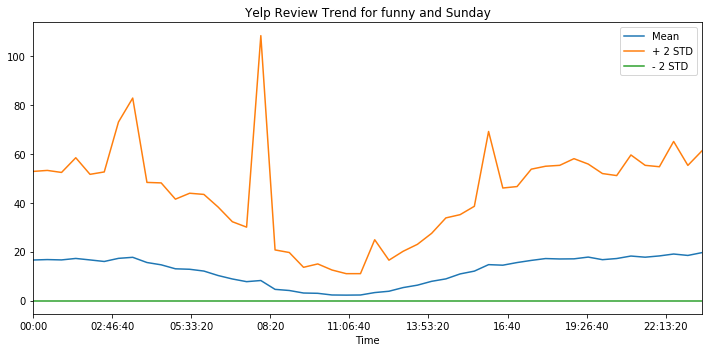

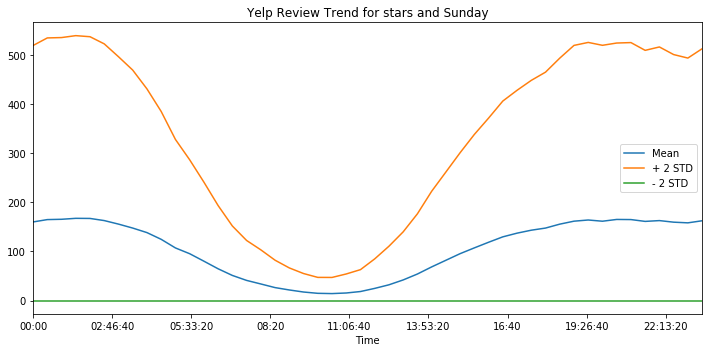

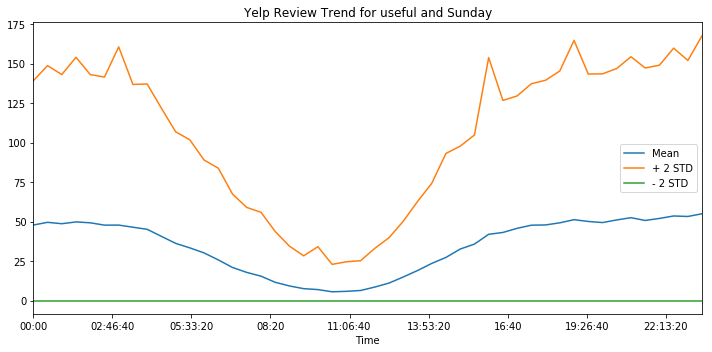

In [27]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in days:
    for col in review_cols:
        #select columns by name
        df_day_avg_col = df_day_avg.filter(regex=col)
        
        ax=df_day_avg_col[df_day_avg_col[col+'_day']==day].unstack(level=0)[col+'_mean'].plot(figsize=(10,5))
        df_day_avg_col[df_day_avg_col[col+'_day']==day].unstack(level=0)[col+'_upper'].plot(ax=ax)
        df_day_avg_col[df_day_avg_col[col+'_day']==day].unstack(level=0)[col+'_lower'].plot(ax=ax)
        ax.set_title('Yelp Review Trend for {} and {}'.format(col, day))
        ax.legend(['Mean','+ 2 STD','- 2 STD'])
        plt.tight_layout()
        plt.savefig('plots/review'+day+'_'+col+'.png')

### Notice here that on average little to no activity happens in the middle of the day. This can be expected since most users will be busy about their day during working hours.